<a href="https://colab.research.google.com/github/Roman-UCSD/coolstar_summer/blob/main/Pandas_and_Matplotlib_Tutorial_Summer_2022_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CA, June 30, 2022

### Learning Goals 

After this tutorial you will learn the following things about the Pandas Library
*   How to create and ccess data inside a dataframe 
*   How to read and write data in a pandas dataframe 
*   How to combine dataframes 
*   How to apply functions to columns and rows in a pandas dataframe

You will also learn the following things about the Matplotlib and Seaborn libraries

*   How to create a scatter plot, line plot and a histogram in Matplotlib
*   How to display uncertainties in a plot
*   How to use subplots
*   How make figures in different styles

### Useful links 

Pandas documentation https://pandas.pydata.org/docs/

Mapltolib documentatuon https://matplotlib.org/stable/index.html

Seaborn documentation https://seaborn.pydata.org/



This notebook can be accessed here  [INSERT LINK]


If you are running this notebook locally, make sure to install matplotlib and seaborn. If you don't have seaborn installed type the command `pip install seaborn` in your terminal


There are many other libraries in python e.g arviz, altair, bokeh but I'll stick to matplotlib and seaborn for visualization 
    




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#use this command to get plots directly in your notebook
%matplotlib inline
#use this command to for a more interactive plot
#%matplotlib notebook

# Introduction to Pandas

Pandas is open-source python library that was developped in the early 2010s. It's main features deal with manipulating tabular data which has made it popular among observational astronomers.

#### Part 1. Introduction to DataFrame Objects

This is the main object in pandas, you can create an empty dataframe by calling it directly



In [2]:
df= pd.DataFrame()
df #this is an empty dataframe

""


We can populate the dataframe with data from a random numpy array


In [3]:
arr= np.random.uniform(0, 1, (10, 2))
print (arr)

df['x']= arr[:,0]
df['y'] = arr[:,1]

print (df)

[[0.22744675 0.14154374]
 [0.89181039 0.8673349 ]
 [0.8306518  0.93669918]
 [0.82042221 0.76881233]
 [0.11968504 0.10697718]
 [0.22931413 0.87102282]
 [0.99290794 0.39062113]
 [0.85585173 0.60903692]
 [0.61801473 0.75722341]
 [0.81722754 0.77064057]]
          x         y
0  0.227447  0.141544
1  0.891810  0.867335
2  0.830652  0.936699
3  0.820422  0.768812
4  0.119685  0.106977
5  0.229314  0.871023
6  0.992908  0.390621
7  0.855852  0.609037
8  0.618015  0.757223
9  0.817228  0.770641


We can visualize the first three rows in the array

In [4]:
df.head(3)

,x,y
0,0.227447,0.141544
1,0.891810,0.867335
2,0.830652,0.936699


In [5]:
df.tail(3)

,x,y
7,0.855852,0.609037
8,0.618015,0.757223
9,0.817228,0.770641


You can get a quick summary of the data 

In [6]:
df.describe()

,x,y
count,10.000000,10.000000
mean,0.640333,0.621991
std,0.324025,0.304222
min,0.119685,0.106977
25%,0.326489,0.445225
50%,0.818825,0.763018
75%,0.849552,0.843161
max,0.992908,0.936699


Let's showcase some general properties of a dataframe object

df.index is the index that keeps track labels for rows. The default is an array of integer but you are able to change it. 


In [7]:
df.index

RangeIndex(start=0, stop=10, step=1)

Let's modify the index to strings instead of integers

In [8]:
df.index= ['row'+str(x) for x in range(len(df))]
df.index

Index(['row0', 'row1', 'row2', 'row3', 'row4', 'row5', 'row6', 'row7', 'row8',
       'row9'],
      dtype='object')

In [9]:
df

,x,y
row0,0.227447,0.141544
row1,0.891810,0.867335
row2,0.830652,0.936699
row3,0.820422,0.768812
row4,0.119685,0.106977
row5,0.229314,0.871023
row6,0.992908,0.390621
row7,0.855852,0.609037
row8,0.618015,0.757223
row9,0.817228,0.770641


🔑 Useful: you can reset the index of a dataframe

In [10]:
df.reset_index(drop=True) #drop=True allows you to drop the previous index

,x,y
0,0.227447,0.141544
1,0.891810,0.867335
2,0.830652,0.936699
3,0.820422,0.768812
4,0.119685,0.106977
5,0.229314,0.871023
6,0.992908,0.390621
7,0.855852,0.609037
8,0.618015,0.757223
9,0.817228,0.770641


Columns: we can access columns in a pandas frame 

In [11]:
df.columns

Index(['x', 'y'], dtype='object')

💪 Exercise: Change the name of the rows in this dataframe to have them start from 1 instead of 0 (row1, row2 and so on)

### Part 2. Introduction Series Objects

The Series object is similar to a dataframe object, but it only takes one-dimensional array. But you can combine multiple Series into a DataFrame

In [12]:
s=pd.Series(arr[:,0])
s

0    0.227447
1    0.891810
2    0.830652
3    0.820422
4    0.119685
5    0.229314
6    0.992908
7    0.855852
8    0.618015
9    0.817228
dtype: float64

In [13]:
df.columns

Index(['x', 'y'], dtype='object')

It's possible to create a Series or Data object from a dictionary

In [14]:
dct= dict({'x': arr[:,0], 'y': arr[:,1]})
pd.Series(dct)

x    [0.22744674699821488, 0.8918103869535258, 0.83...
y    [0.14154374120030766, 0.867334895998503, 0.936...
dtype: object

💪 Exercise: Create 2 Series objects, one for x and one y and combine them into a pandas DataFrame


### Part 3. Reading and writing Data

Pandas allows you to read and write tables into files 

For more information on all the read methods, see the documentation  https://pandas.pydata.org/docs/reference/io.html

Pandas can read and write many types of files the most types of files in astronomy are
*   CSV, TXT, ASCII files
*   HDF files
*   Excel tables
*   XML files
*   LATEX file
*   SQL tables
*   HTML files
*  🛑 PICKLE file ---> be careful with these files


In most cases the syntax to read files is pd.read_csv, pd.read_hdf etc..

To write files, this is done directly from the dataframe e.g df.to_csv etc..


###  Part 4: Accessing cells, rows and columns in DataFrames

- Accessing columns

In [15]:
df['x']

row0    0.227447
row1    0.891810
row2    0.830652
row3    0.820422
row4    0.119685
row5    0.229314
row6    0.992908
row7    0.855852
row8    0.618015
row9    0.817228
Name: x, dtype: float64

Columns are also properties of DataFrames so you can call them directly.


In [16]:
df.x

row0    0.227447
row1    0.891810
row2    0.830652
row3    0.820422
row4    0.119685
row5    0.229314
row6    0.992908
row7    0.855852
row8    0.618015
row9    0.817228
Name: x, dtype: float64

- Boolean indexing

Pandas allows you to select specific rows by passing a boolean index

For example, let's select where the x> 0.5

In [17]:
mask = df.x >0.5
mask

row0    False
row1     True
row2     True
row3     True
row4    False
row5    False
row6     True
row7     True
row8     True
row9     True
Name: x, dtype: bool

In [18]:
df[ mask]

,x,y
row1,0.891810,0.867335
row2,0.830652,0.936699
row3,0.820422,0.768812
row6,0.992908,0.390621
row7,0.855852,0.609037
row8,0.618015,0.757223
row9,0.817228,0.770641


- Selecting by label 

In [19]:
df.loc['row5']

x    0.229314
y    0.871023
Name: row5, dtype: float64

In [20]:
df.loc['row5', ['x']]

x    0.229314
Name: row5, dtype: float64

- Selecting by position


In [21]:
df.iloc[0]

x    0.227447
y    0.141544
Name: row0, dtype: float64

In [22]:
df.iloc[-1]

x    0.817228
y    0.770641
Name: row9, dtype: float64

- Querying

This is my second favorite feature in pandas, you can write complex queries to the data 

For more examples see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html 

In [23]:
df.query('x > 0.5 and y < 0.5')

,x,y
row6,0.992908,0.390621


💪 Exercise: select rows where x and y values are both between 0.1 and 0.7

### Part 5. Sorting Data

Pandas has implemented sorting

In [24]:
df.sort_values(by='x')

,x,y
row4,0.119685,0.106977
row0,0.227447,0.141544
row5,0.229314,0.871023
row8,0.618015,0.757223
row9,0.817228,0.770641
row3,0.820422,0.768812
row2,0.830652,0.936699
row7,0.855852,0.609037
row1,0.891810,0.867335
row6,0.992908,0.390621


You can also sort by row or column

In [25]:
df.sort_index(axis=0) #0 for index and 1 for colunns

,x,y
row0,0.227447,0.141544
row1,0.891810,0.867335
row2,0.830652,0.936699
row3,0.820422,0.768812
row4,0.119685,0.106977
row5,0.229314,0.871023
row6,0.992908,0.390621
row7,0.855852,0.609037
row8,0.618015,0.757223
row9,0.817228,0.770641


In [26]:
df.sort_index(axis=1) #0 for index and 1 for colunns

,x,y
row0,0.227447,0.141544
row1,0.891810,0.867335
row2,0.830652,0.936699
row3,0.820422,0.768812
row4,0.119685,0.106977
row5,0.229314,0.871023
row6,0.992908,0.390621
row7,0.855852,0.609037
row8,0.618015,0.757223
row9,0.817228,0.770641


## Part 6: Combining DataFrames

There are mutiple ways to combine various dataframes

- Concat: horizontal combines dataframes 

In [27]:
#let's create another random dataframe

df2=pd.DataFrame()

df2['x']=np.random.uniform(0, 1, 20)
df2['y']= np.random.uniform(0, 1, 20)
df2.index=['row'+str(i) for i in range(len(df2))]
dfc= pd.concat([df, df2])
dfc

,x,y
row0,0.227447,0.141544
row1,0.891810,0.867335
row2,0.830652,0.936699
row3,0.820422,0.768812
row4,0.119685,0.106977
row5,0.229314,0.871023
row6,0.992908,0.390621
row7,0.855852,0.609037
row8,0.618015,0.757223
row9,0.817228,0.770641


- Merge: horizontal combines vertically, the two dataframes must have a common key to merge on 

  For more information see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

  Inner merge: only merge where there is an intersection of keys

  Outer merge: union of both keys to create a new key

  Left merge: use keys from the left frame

  Right merge: use the right key


For example let's create 2 random dataframes with unique keys, create a label for values > 0.5 and for values < 0.5 and merge them together

In [28]:
df3=pd.DataFrame()
df3['x']=np.random.uniform(0, 1, 20)
df3['y']= np.random.uniform(0, 1, 20)
df3['unique_key']= (df3.x > 0.5).astype(int)

df4=pd.DataFrame()
df4['a']=np.random.uniform(0, 1, 10)
df4['b']= np.random.uniform(0, 1, 10)
df4['unique_key']= (df4.a >0.5).astype(int)

In [29]:
df4.head(5)

,a,b,unique_key
0,0.009747,0.919298,0
1,0.012047,0.424114,0
2,0.648264,0.035402,1
3,0.956935,0.319940,1
4,0.148494,0.815427,0


In [30]:
df3.head(5)

,x,y,unique_key
0,0.374527,0.397383,0
1,0.649827,0.334058,1
2,0.553905,0.505691,1
3,0.431244,0.092862,0
4,0.821183,0.682326,1


In [31]:
df4.merge(df3, how='inner', on='unique_key')

,a,b,unique_key,x,y
0,0.009747,0.919298,0,0.374527,0.397383
1,0.009747,0.919298,0,0.431244,0.092862
2,0.009747,0.919298,0,0.401080,0.518187
3,0.009747,0.919298,0,0.484700,0.923213
4,0.009747,0.919298,0,0.027569,0.821870
...,...,...,...,...,...
95,0.879993,0.317938,1,0.961486,0.186002
96,0.879993,0.317938,1,0.592642,0.773961
97,0.879993,0.317938,1,0.711754,0.021662
98,0.879993,0.317938,1,0.722080,0.372937


💪 Exercise: Do left merge of df3 and df4 and query where the values of a, b, x, y and are all between 0.1 and 0.6

##  Part 7: Applying Operations

This is my favorite feature in pandas 

You can apply functions to pandas dataframes using .apply or .applymap

- Applying a function to columns


In [32]:
def divide_by_two(x):
  return x/2

df.x.apply(divide_by_two)


row0    0.113723
row1    0.445905
row2    0.415326
row3    0.410211
row4    0.059843
row5    0.114657
row6    0.496454
row7    0.427926
row8    0.309007
row9    0.408614
Name: x, dtype: float64

- Applying functions to Rows

You can apply a function horinzotally as well

In [33]:
df[['x', 'y']].apply(lambda row : row.x+row.y, axis=1)

row0    0.368990
row1    1.759145
row2    1.767351
row3    1.589235
row4    0.226662
row5    1.100337
row6    1.383529
row7    1.464889
row8    1.375238
row9    1.587868
dtype: float64

But of course for this case this will do the job but for more complex functions,this works well


In [34]:
df.x+df.y

row0    0.368990
row1    1.759145
row2    1.767351
row3    1.589235
row4    0.226662
row5    1.100337
row6    1.383529
row7    1.464889
row8    1.375238
row9    1.587868
dtype: float64

💪 Exercise: Add a new column z to df that takes z= $x^2+y^2$. Use the applymap function instead of just adding them manually

You can even get a progress bar using the tqdm module

In [35]:
from tqdm.notebook import tqdm
tqdm.pandas()
df.x.progress_apply(divide_by_two)

  0%|          | 0/10 [00:00<?, ?it/s]

row0    0.113723
row1    0.445905
row2    0.415326
row3    0.410211
row4    0.059843
row5    0.114657
row6    0.496454
row7    0.427926
row8    0.309007
row9    0.408614
Name: x, dtype: float64

## Part 8: Plotting 

Panda can make plots directly https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

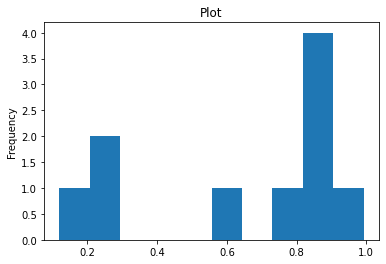

In [36]:
df.x.plot(kind='hist', xlabel='values', ylabel='frequency', title='Plot')

# Introduction to Maptlotlib

Matplotlib is our main visualization library

For this part of the exercise we are going to be using the iris dataset https://archive.ics.uci.edu/ml/datasets/iris

The data is saved inside the seaborn libray

In [37]:
data=sns.load_dataset('iris')

Let's visualize the table

In [38]:
data.head(5) 

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Part 1. Most Common Plots
- Line Plots



[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

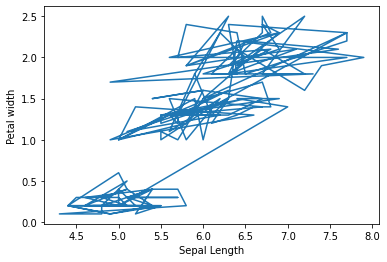

In [39]:
fig, ax=plt.subplots() 
#here we are creating python objects named fig and ax 
ax.plot(data.sepal_length, data.petal_width) 
#add points to the ax object not the fig object
ax.set(xlabel='Sepal Length', ylabel='Petal width') 
#set properties of the axes
#plt.savefig() save figure

💪 Exercise: change the line size


- Step Plots

These are similar in syntax, except we are now using .step

[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

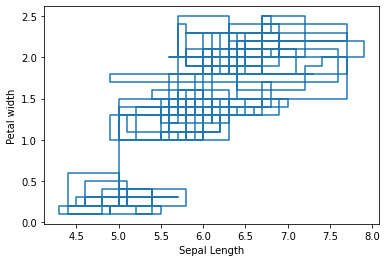

In [40]:
fig, ax=plt.subplots() 
ax.step(data.sepal_length, data.petal_width)  
ax.set(xlabel='Sepal Length', ylabel='Petal width')

💪  Exercise: change the line style

- Scatter Plots

Again, it's the a similar syntax, except we are now using .scatter

[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

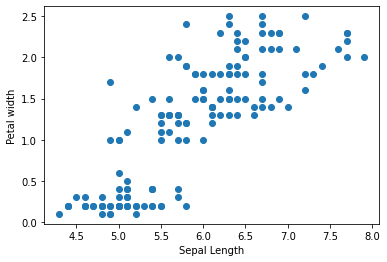

In [41]:
fig, ax=plt.subplots()
ax.scatter(data.sepal_length, data.petal_width) 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 

💪 Exercise: plot these with rectangles as markers, increase the fontsize

- Displaying Uncertanties

Since there are no uncertanities in these data, let's make up our own <br>

let's choose uncertainties= 10% times data

Let's use a for loop to populate our dataframe  with new columns


In [42]:
for column in ['sepal_length','sepal_width', 'petal_length', 'petal_width']:
    err_column=column+'_er'
    data[err_column]= 0.1*data[column].values

Let's preview the data to check if these columns were added 

In [43]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_length_er,sepal_width_er,petal_length_er,petal_width_er
0,5.1,3.5,1.4,0.2,setosa,0.51,0.35,0.14,0.02
1,4.9,3.0,1.4,0.2,setosa,0.49,0.30,0.14,0.02
2,4.7,3.2,1.3,0.2,setosa,0.47,0.32,0.13,0.02
3,4.6,3.1,1.5,0.2,setosa,0.46,0.31,0.15,0.02
4,5.0,3.6,1.4,0.2,setosa,0.50,0.36,0.14,0.02


[Text(0, 0.5, 'Petal width'), Text(0.5, 0, 'Sepal Length')]

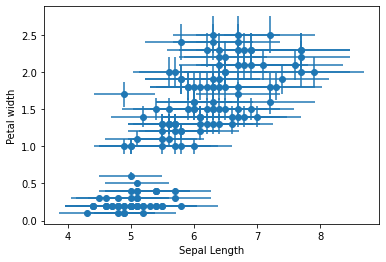

In [44]:
fig, ax=plt.subplots()
ax.errorbar(data.sepal_length,  data.petal_width,
            xerr= data.sepal_length_er, yerr=data.petal_width_er, fmt='o') 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 

💪 Exercise: increase the size of the uncertainty bars

- 1D-Histograms

[Text(0, 0.5, 'Number'), Text(0.5, 0, 'Sepal Length')]

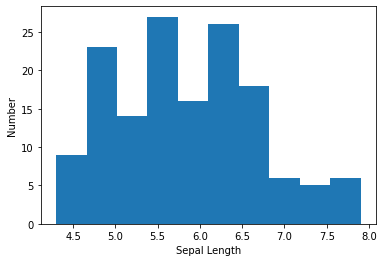

In [45]:
fig, ax=plt.subplots() 
binedges=ax.hist(data.sepal_length) 
ax.set(xlabel='Sepal Length', ylabel='Number') 

In [46]:
#returns the number of object per bin bins and bin edges and BarContainer object
binedges

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

💪 Exercise: change the number of bins, is this a better plot?

- 2D-Histograms

[Text(0, 0.5, 'Number ')]

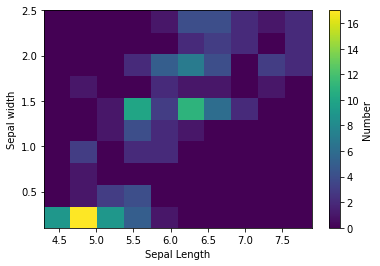

In [47]:
#same syntax as 1d-histograms
fig, ax=plt.subplots() 
h=ax.hist2d(data.sepal_length, data.petal_width)
ax.set(xlabel='Sepal Length', ylabel='Sepal width')
#we can add a color bar 
cbar=fig.colorbar(h[-1], ax=ax, orientation='vertical')
cbar.ax.set(ylabel='Number ')

💪 Exercise: adjust the number of bins, what's the optimal number of bins ?

#### Part 2. Using Colors 

Let's subdivide our data set by species 



How many species of flowers are there in this set?


In [48]:
np.unique(data.species) #use numpy (another python library)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We can split our pandas dataframe into three dataframes and plot them separately with three different colors

In [49]:
setosa_data=data[data.species=='setosa']
virginica_data=data[data.species== 'virginica']
versicolor_data=data[data.species=='versicolor']

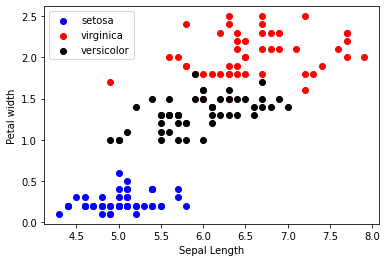

In [50]:
fig, ax=plt.subplots() 

ax.scatter(setosa_data.sepal_length, setosa_data.petal_width,\
           color='blue', label='setosa') 

ax.scatter(virginica_data.sepal_length, virginica_data.petal_width,
            color='red', label='virginica') 

ax.scatter(versicolor_data.sepal_length, versicolor_data.petal_width, 
           color='black', label='versicolor') 

ax.set(xlabel='Sepal Length', ylabel='Petal width') 
#add a legend
legnd=ax.legend() 

💪 Exercise: plot histograms of sepal length for these three species

Numerical colors and colormaps <br>
https://matplotlib.org/stable/tutorials/colors/colormaps.html

Sometimes colors can be used to represent a new dimension of the data


[Text(0, 0.5, 'Sepal width ')]

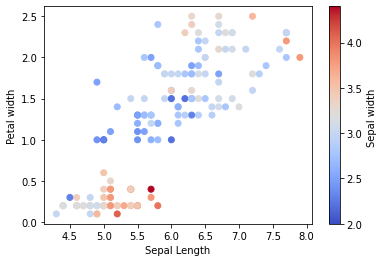

In [51]:
fig, ax=plt.subplots() 
c=ax.scatter(data.sepal_length, data.petal_width,\
           c=data.sepal_width.values, cmap='coolwarm') 
ax.set(xlabel='Sepal Length', ylabel='Petal width') 
cbar=plt.colorbar(c)
cbar.ax.set(ylabel='Sepal width ')

#### Part 3. Subplots 

Subplots are useful for combining multiple plots in one figure <br>
Here is how I typically use them

Link to documentation
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

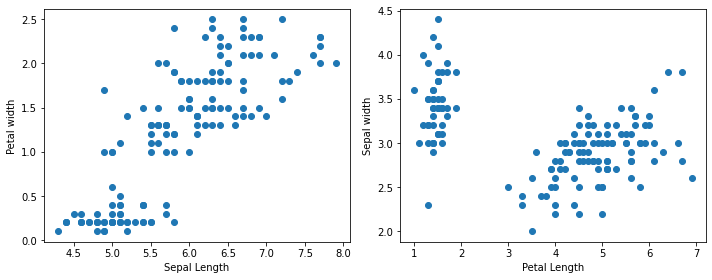

In [52]:
fig, ax=plt.subplots(ncols=2, figsize=(10, 4))  #I'm also adjusting the size of the figure
#ax is now a list of 2 axes objects
ax[0].scatter(data.sepal_length, data.petal_width) 
ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 

ax[1].scatter(data.petal_length, data.sepal_width) 
ax[1].set(xlabel='Petal Length', ylabel='Sepal width')

plt.tight_layout()#command to clean up

💪 Exercise: do a 4 by 4 subplots and plot every combination of columns

#### Part 4. Styling, ticks, grids, fontsize etc.

Let's add ticks and a grid

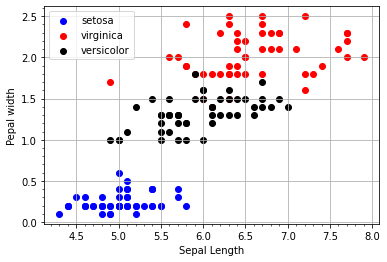

In [53]:
fig, ax=plt.subplots() 

ax.scatter(setosa_data.sepal_length, setosa_data.petal_width,\
           color='blue', label='setosa') 

ax.scatter(virginica_data.sepal_length, virginica_data.petal_width,
            color='red', label='virginica') 

ax.scatter(versicolor_data.sepal_length, versicolor_data.petal_width, 
           color='black', label='versicolor') 

ax.set(xlabel='Sepal Length', ylabel='Pepal width') 

#add a legend
legnd=ax.legend() 

#add minorticks
ax.minorticks_on()
#add grid on major ticks
ax.grid()

Using colors is not always the best thing to do, it can be misleading e.g our interperation of "red" vs "blue". <br>
It's better to visualize every plot in greyscale first then add colors later

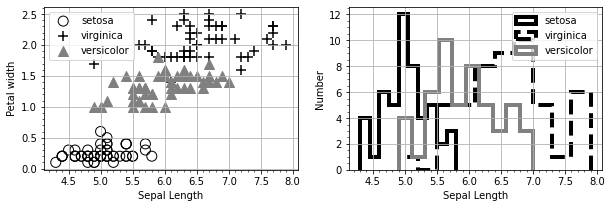

In [54]:
fig, ax=plt.subplots(ncols=2, figsize=(10, 3)) 
############################ SCATTER PLOTS ###################################
ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width, label='setosa',  marker='o', color='None', edgecolor='black', s=100)
ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width,label='virginica',  marker='+', color='black', edgecolor='black', s=100)
ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', color='grey', marker='^', edgecolor='grey', s=100)
ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 
############################ HISTOGRAMS ###################################
ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', label='setosa')
ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', color='black', label='virginica')
ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='grey',label='versicolor')
ax[1].set(xlabel='Sepal Length', ylabel='Number') 
for a in ax:
    #add a legend add legend and grid for both axes
    legnd=a.legend()
    a.minorticks_on()
    a.grid()

There are some more elegant matploltib default plotting styles

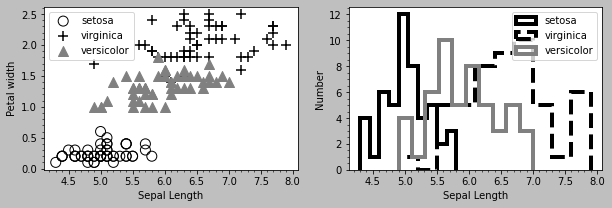

In [55]:
#this command applies the grayscale style in this cell
with plt.style.context("grayscale"): 
    fig, ax=plt.subplots(ncols=2, figsize=(10, 3)) 
    ############################ SCATTER PLOTS ###################################
    ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width,label='setosa',  marker='o', color='None', edgecolor='black', s=100)
    ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width,label='virginica',  marker='+', color='black', edgecolor='black', s=100)
    ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', color='grey', marker='^', edgecolor='grey', s=100)
    ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 
    ############################ HISTOGRAMS ###################################
    ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', label='setosa')
    ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', color='black', label='virginica')
    ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='grey', label='versicolor')
    ax[1].set(xlabel='Sepal Length', ylabel='Number') 
    for a in ax:
        #add a legend add legend and grid for both axes
        legnd=a.legend()
        a.minorticks_on()

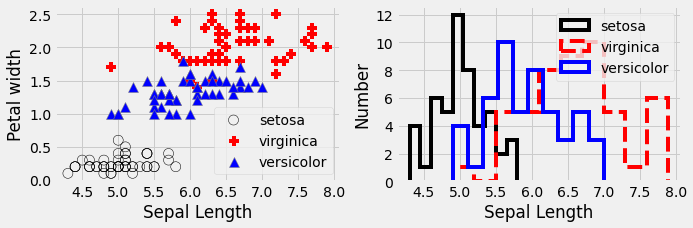

In [56]:
#five thirty eight style 
with plt.style.context("fivethirtyeight"):
    fig, ax=plt.subplots(ncols=2, figsize=(10, 3)) 
    ############################ SCATTER PLOTS ###################################
    ax[0].scatter(setosa_data.sepal_length, setosa_data.petal_width, label='setosa',  marker='o', color='None', edgecolor='black', s=100)
    ax[0].scatter(virginica_data.sepal_length, virginica_data.petal_width, label='virginica',  marker='+', color='red', edgecolor='black', s=100)
    ax[0].scatter(versicolor_data.sepal_length, versicolor_data.petal_width, label='versicolor', color='blue', marker='^', edgecolor='grey', s=100)
    ax[0].set(xlabel='Sepal Length', ylabel='Petal width') 
    ############################ HISTOGRAMS ###################################
    ax[1].hist(setosa_data.sepal_length, histtype='step', lw=4, color='black', label='setosa')
    ax[1].hist(virginica_data.sepal_length,  histtype='step', lw=4, linestyle='--', color='red', label='virginica')
    ax[1].hist(versicolor_data.sepal_length,  histtype='step', lw=4, color='blue', label='versicolor')
    ax[1].set(xlabel='Sepal Length', ylabel='Number') 
    for a in ax:
        #add a legend add legend and grid for both axes
        legnd=a.legend()
        a.minorticks_on()

### Part 5 Advanced Plotting using Seaborn & Arviz 

Seaborn Gallery https://seaborn.pydata.org/examples/index.html <br>
Arviz Gallery https://arviz-devs.github.io/arviz/examples/index.html

Seaborn aesthetics https://seaborn.pydata.org/tutorial/aesthetics.html



- Box plots

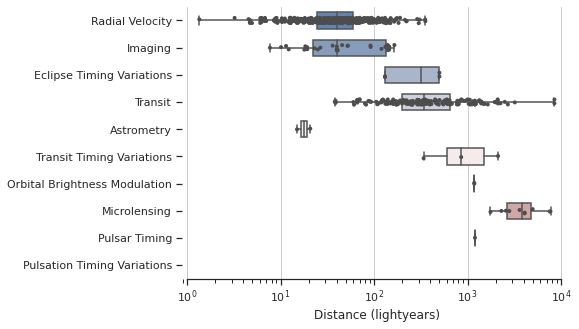

In [57]:
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 5))
ax.set_xscale("log")
# Load the example planets dataset (different from the iris dataset)
#source https://exoplanets.nasa.gov/discovery/exoplanet-catalog/
planets = sns.load_dataset("planets")
# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets, whis=[0, 100], width=.6, palette="vlag")
# Add in points to show each observation
sns.stripplot(x="distance", y="method", data=planets, size=4, color=".3", linewidth=0)
# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="", xlabel='Distance (lightyears)')
sns.despine(trim=True, left=True)

- Heat maps

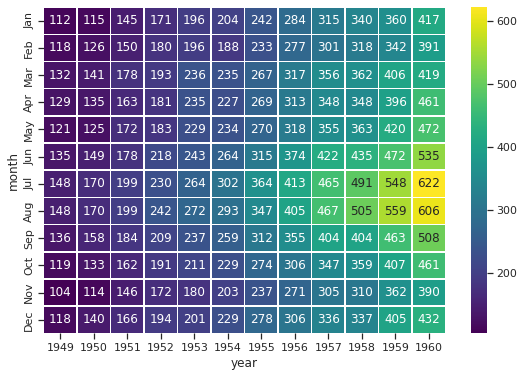

In [58]:
# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='viridis')

References: <br>
    - Matplotlib documentation <br>
    - Seaborn documentation <br> 
    - Adam Miller: salience with matplotlib https://github.com/LSSTC-DSFP/LSSTC-DSFP-Sessions/blob/master/Session12/Day1/SalienceInMatplotlibSolutions.ipynb <br>
    

Links to functions that we will be using in this tutorial: <br>
axes.plot https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html <br>
axes.step https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.step.html <br>
axes.scatter https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html <br>
axes.errorbar https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html <br>
axes.hist https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html <br>
axes.hist2d https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html <br>